In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
sns.set(style="ticks", color_codes=True)


from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
# Loading the data again.


df = pd.read_csv('/Users/mille/Desktop/SQL work/covtype.csv', low_memory=False)
print('Dataframe dimensions:', df.shape)


# providing more information per column on data types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
column type,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:

# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## Logistic Regression 

In [7]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.model_selection import train_test_split


In [12]:
X = df.loc[:, 'Elevation':'Soil_Type40']
y = df['Cover_Type']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression


In [15]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [16]:
predictions = logmodel.predict(X_test)


In [17]:
from sklearn.metrics import classification_report


In [18]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           1       0.61      0.66      0.64     69978
           2       0.63      0.75      0.69     93523
           3       0.57      0.24      0.34     11696
           4       0.00      0.00      0.00       875
           5       0.00      0.00      0.00      3225
           6       0.15      0.00      0.01      5762
           7       0.00      0.00      0.00      6675

    accuracy                           0.62    191734
   macro avg       0.28      0.24      0.24    191734
weighted avg       0.57      0.62      0.59    191734



 # 62% accuracy

## Kfold

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [28]:
kfold = KFold(n_splits=7, random_state=None, shuffle=False)



In [29]:
result = cross_val_score(logmodel, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.6033007896496988


In [30]:
## Accurary 60 %

In [31]:
## Grid Search CV

import numpy as np
from sklearn import linear_model

In [32]:
from sklearn.model_selection import GridSearchCV

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np

In [39]:
X = df.loc[:, 'Elevation':'Soil_Type40']
y = df['Cover_Type']

In [40]:
from sklearn.linear_model import LogisticRegression


In [41]:
logistic = linear_model.LogisticRegression()


In [42]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [43]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(LogisticRegression, hyperparameters, cv=5, verbose=0)

In [44]:
print(clf)

GridSearchCV(cv=5,
             estimator=<class 'sklearn.linear_model._logistic.LogisticRegression'>,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})


In [46]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.622842062440673


In [ ]:
## 62.3% 

In [58]:
predictions = logreg2.predict(X_test)


In [59]:
from sklearn.metrics import classification_report


In [60]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           1       0.61      0.66      0.64     69978
           2       0.63      0.75      0.69     93523
           3       0.57      0.24      0.34     11696
           4       0.00      0.00      0.00       875
           5       0.00      0.00      0.00      3225
           6       0.15      0.00      0.01      5762
           7       0.00      0.00      0.00      6675

    accuracy                           0.62    191734
   macro avg       0.28      0.24      0.24    191734
weighted avg       0.57      0.62      0.59    191734



In [61]:
## 62 % accuracy of F1-score

In [62]:
!pip install imblearn

In [63]:

from collections import Counter
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

In [64]:
# fraction of rows
# here you get 75% of the rows
df.sample(frac=0.75, random_state=99)
train = df.sample(frac=0.75, random_state=99)

In [65]:
# you can't simply split 0.75 and 0.25 without overlapping
# this code tries to find that train = 75% and test = 25%
test = df.loc[~df.index.isin(train.index), :]

In [66]:

X = df.loc[:, 'Elevation':'Soil_Type40']
y = df['Cover_Type']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

# Create a pipeline
pipeline = make_pipeline(NearMiss('not majority', version=2),
                         LinearSVC(random_state=42))
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

Training target statistics: Counter({2: 212525, 1: 158834, 3: 26845, 7: 15445, 6: 12994, 5: 7020, 4: 2096})
Testing target statistics: Counter({2: 70776, 1: 53006, 3: 8909, 7: 5065, 6: 4373, 5: 2473, 4: 651})
                   pre       rec       spe        f1       geo       iba       sup

          1       0.00      0.00      1.00      0.00      0.00      0.00     53006
          2       0.51      0.99      0.11      0.68      0.33      0.12     70776
          3       0.74      0.03      1.00      0.05      0.17      0.03      8909
          4       0.37      0.05      1.00      0.09      0.23      0.05       651
          5       0.00      0.00      1.00      0.00      0.00      0.00      2473
          6       0.29      0.53      0.96      0.37      0.71      0.49      4373
          7       0.72      0.03      1.00      0.06      0.18      0.03      5065

avg / total       0.33      0.50      0.56      0.35      0.20      0.07    145253



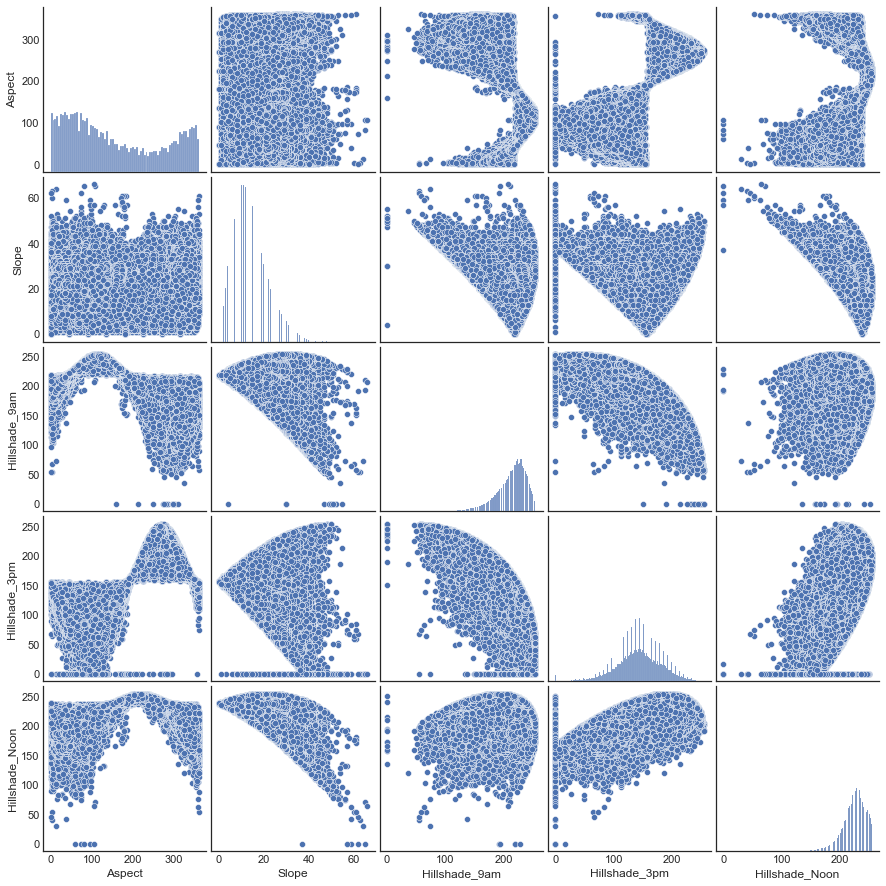

In [68]:
sns.pairplot(df[['Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_3pm', 'Hillshade_Noon']])


In [69]:
data = df.loc[:, 'Elevation':'Soil_Type40']
target = df['Cover_Type']

In [70]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [71]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.6329440720119102
Testing on Sample: 0.6316960751240939


In [72]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
f1_score(target, y_pred, average='macro')
f1_score(target, y_pred, average='micro')
f1_score(target, y_pred, average='weighted')


0.62033315951235

In [74]:
print(classification_report(target, y_pred))


              precision    recall  f1-score   support

           1       0.65      0.48      0.55    211840
           2       0.65      0.76      0.70    283301
           3       0.60      0.87      0.71     35754
           4       0.55      0.43      0.48      2747
           5       0.22      0.06      0.10      9493
           6       0.24      0.23      0.23     17367
           7       0.63      0.61      0.62     20510

    accuracy                           0.63    581012
   macro avg       0.51      0.49      0.49    581012
weighted avg       0.63      0.63      0.62    581012



In [75]:
f1_score(target, y_pred, average=None)


array([0.55119701, 0.70274974, 0.71317334, 0.47952498, 0.09873107,
       0.23302741, 0.62240048])

In [76]:
!pip install xgboost

In [77]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [79]:

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
X = df.loc[:, 'Elevation':'Soil_Type40']
y = df['Cover_Type']

In [80]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [81]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

[12:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
print(model)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [83]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [84]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))

Accuracy: 86.90%
              precision    recall  f1-score   support

           1       0.86      0.84      0.85     70052
           2       0.86      0.90      0.88     93189
           3       0.90      0.91      0.91     11873
           4       0.92      0.86      0.89       972
           5       0.89      0.56      0.68      3124
           6       0.84      0.80      0.82      5687
           7       0.94      0.92      0.93      6837

    accuracy                           0.87    191734
   macro avg       0.89      0.83      0.85    191734
weighted avg       0.87      0.87      0.87    191734



In [85]:
## Overall accurary 85.90 %

In [86]:
## Hyperparameter Xgboost

In [87]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from datetime import datetime

In [88]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [89]:
xgb2 = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [90]:
xgb2=XGBClassifier()
xgb2.fit(X_train,y_train)
print("score",xgb2.score(X_test,y_test))

[12:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score 0.8689799409598715


In [91]:
# make predictions for test data
y_pred = xgb2.predict(X_test)
predictions = [round(value) for value in y_pred]

In [92]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions))

Accuracy: 86.90%
              precision    recall  f1-score   support

           1       0.86      0.84      0.85     70052
           2       0.86      0.90      0.88     93189
           3       0.90      0.91      0.91     11873
           4       0.92      0.86      0.89       972
           5       0.89      0.56      0.68      3124
           6       0.84      0.80      0.82      5687
           7       0.94      0.92      0.93      6837

    accuracy                           0.87    191734
   macro avg       0.89      0.83      0.85    191734
weighted avg       0.87      0.87      0.87    191734



In [93]:
## Random Forest 

In [94]:
from sklearn.ensemble import RandomForestClassifier


In [95]:

%%time
rfc = RandomForestClassifier(n_estimators=600)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)


Wall time: 8min 30s


In [96]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(rfc.feature_importances_)



              precision    recall  f1-score   support

           1       0.96      0.94      0.95     70052
           2       0.95      0.97      0.96     93189
           3       0.94      0.96      0.95     11873
           4       0.93      0.83      0.87       972
           5       0.95      0.76      0.84      3124
           6       0.93      0.89      0.91      5687
           7       0.97      0.95      0.96      6837

    accuracy                           0.95    191734
   macro avg       0.95      0.90      0.92    191734
weighted avg       0.95      0.95      0.95    191734

[[65856  4009     5     0    15    10   157]
 [ 2059 90710   177     0    98   116    29]
 [    3   171 11433    41     6   219     0]
 [    0     0   133   804     0    35     0]
 [   38   670    32     0  2371    13     0]
 [    5   198   391    23     6  5064     0]
 [  302    42     0     0     1     0  6492]]
[2.43690925e-01 4.82617743e-02 3.31785986e-02 6.04924022e-02
 5.75433477e-02 1.16200388

In [97]:
## Feature importance

Feature ranking:
1. feature 0 (0.200254)
2. feature 5 (0.111836)
3. feature 9 (0.105239)
4. feature 3 (0.064380)
5. feature 4 (0.059013)
6. feature 1 (0.052018)
7. feature 7 (0.045359)
8. feature 6 (0.043041)
9. feature 8 (0.042506)
10. feature 13 (0.036953)
11. feature 2 (0.036912)
12. feature 35 (0.018627)
13. feature 25 (0.015259)
14. feature 52 (0.013681)
15. feature 51 (0.013579)
16. feature 17 (0.013492)
17. feature 23 (0.012443)
18. feature 12 (0.012393)
19. feature 36 (0.012063)
20. feature 10 (0.011240)
21. feature 15 (0.009663)
22. feature 53 (0.008031)
23. feature 11 (0.006156)
24. feature 26 (0.005243)
25. feature 42 (0.005102)
26. feature 37 (0.004286)
27. feature 45 (0.003969)
28. feature 24 (0.003889)
29. feature 46 (0.003821)
30. feature 43 (0.003623)
31. feature 44 (0.003205)
32. feature 19 (0.002635)
33. feature 16 (0.002620)
34. feature 48 (0.002308)
35. feature 33 (0.002104)
36. feature 30 (0.001999)
37. feature 14 (0.001383)
38. feature 34 (0.001182)
39. feature 32

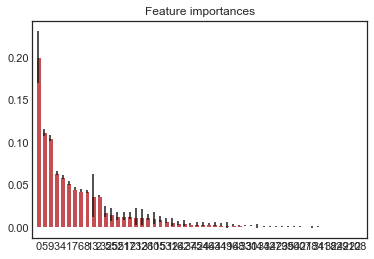

In [98]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [99]:
# Hyperparameters - Random Forests

In [100]:

param_grid = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [101]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=600),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100]})

In [102]:
CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [103]:
rfc1=RandomForestClassifier(random_state=10, max_features='auto', n_estimators= 50, max_depth=4, criterion='gini')


In [104]:
rfc1.fit(X_train, y_train)
predictions=rfc1.predict(X_test)


In [105]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           1       0.64      0.73      0.68     70052
           2       0.69      0.76      0.73     93189
           3       0.62      0.52      0.57     11873
           4       0.00      0.00      0.00       972
           5       0.00      0.00      0.00      3124
           6       0.00      0.00      0.00      5687
           7       0.00      0.00      0.00      6837

    accuracy                           0.67    191734
   macro avg       0.28      0.29      0.28    191734
weighted avg       0.61      0.67      0.64    191734

